In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats.stats import pearsonr 

In [3]:
spike1 = np.genfromtxt('trace1.txt')
len1 = spike1.shape[0]
t = np.arange(0,100,1/20000)

Text(0.5, 0, 'Time, s')

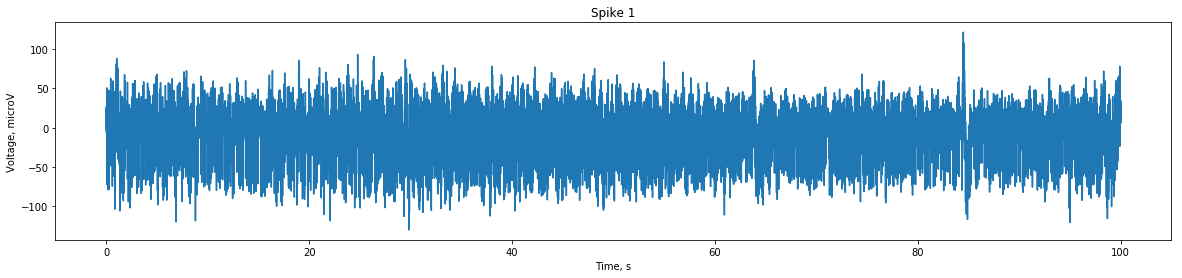

In [4]:
plt.figure(figsize = (20,4))
plt.plot(t, spike1)
plt.title('Spike 1')
plt.ylabel('Voltage, microV')
plt.xlabel('Time, s')

In [5]:
# thr1 = len1 - 100000
# thr2 = len1
# plt.figure(figsize = (20,4))
# plt.plot(t[thr1:thr2], spike1[thr1:thr2])
# plt.title('Spike 1')
# plt.ylabel('Voltage, microV')
# plt.xlabel('Time, s')

In [6]:
T = 100
smooth_spike = np.empty(len1 - T)
for time in range(len1-T):
    smooth_spike[time] = sum(spike1[time:time+T])/T
smooth_t = t[int(T/2):-int(T/2)]

In [7]:
bs_spike1 = spike1[int(T/2):-int(T/2)] - smooth_spike

In [8]:
thr = -50
z = np.zeros(len(bs_spike1), dtype=int)
for i in range(len(bs_spike1)):
    if (bs_spike1[i] < thr) & (bs_spike1[i-1] > thr):
        z[i] += 1

In [9]:
sum(z)

1226

#### (i) take many contiguous chunks of z of length 500, 750, 1000, 2500, 5000, . . . , 100000 time bins, and on each chunk estimate the “spike rate”, as the number of spikes in that chunk divided by the length of that chunk;
what is "many" times?

In [10]:
np.random.seed(10)
n_iter = 1000
bin_size = np.array([500,750,1000,2500,5000,7500,10000,25000,50000,75000,100000])
spike_rate = np.empty((len(bin_size),n_iter))

for j in range(len(bin_size)):
    start_i = np.random.choice(np.arange(0,len(bs_spike1)-bin_size[j]), size = n_iter, 
                               replace = False)
    for i,index in enumerate(start_i):
        spike_rate[j,i] = sum(z[index:index+bin_size[j]])/bin_size[j]

In [11]:
# spike_rate

#### (ii) estimate the error in the spike rate by computing the SD over chunks of the same length, as in the classic bootstrap;

In [12]:
mean_spike_rate = np.mean(spike_rate, axis = 1)
std_spike_rate = np.std(spike_rate, axis = 1)

Text(0.5, 0, 'Bin size')

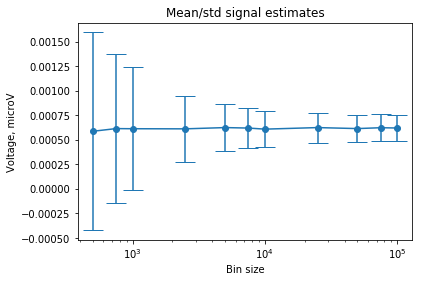

In [13]:
plt.figure(figsize = (6,4))
plt.title('Mean/std signal estimates')
plt.errorbar(bin_size, y = mean_spike_rate, yerr = std_spike_rate, capsize = 10, marker = 'o')
# plt.hlines(1, 0, 4, linestyles='--', label = 'Std = 1')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xlabel('Method')
# plt.xlim(0,4)
plt.xscale('log')
plt.ylabel('Voltage, microV')
plt.xlabel('Bin size')

#### (iii) plot this error as a function of the chunk length, on the semilogx plot. Does the error bar decrease with the chunk length as you would expect?

Text(0.5, 0, 'Bin size')

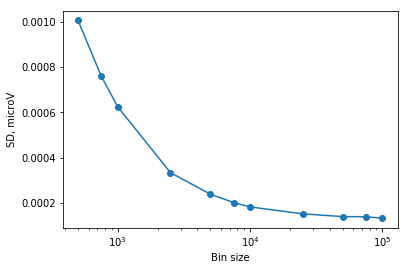

In [14]:
plt.figure(figsize = (6,4))
plt.plot(bin_size, std_spike_rate, 'o-')
plt.xscale('log')
plt.ylabel('SD, microV')
plt.xlabel('Bin size')

#### (iv) To get a better intuition, compare this plot of spike rate error bar vs chunk length for the vector z whose elements you first randomly permuted to break all temporal correlations. Check that in this permuted control, the spike rate error bar decrease as (chunk length)−1/2. If you see a deviation from that behavior of the spike rate error bar for the original z, what could be the source of such deviations?

In [15]:
np.random.seed(10)
# n_iter = 1000
# bin_size = np.array([500,750,1000,2500,5000,7500,10000,25000,50000,75000,100000])
random_spike_rate = np.empty((len(bin_size),n_iter))
z1 = np.copy(z)
random.shuffle(z1)

for j in range(len(bin_size)):
    start_i = np.random.choice(np.arange(0,len(bs_spike1)-bin_size[j]), size = n_iter, 
                               replace = False)
    for i,index in enumerate(start_i):
        random_spike_rate[j,i] = sum(z1[index:index+bin_size[j]])/bin_size[j]

In [16]:
random_mean_spike_rate = np.mean(random_spike_rate, axis = 1)
random_std_spike_rate = np.std(random_spike_rate, axis = 1)

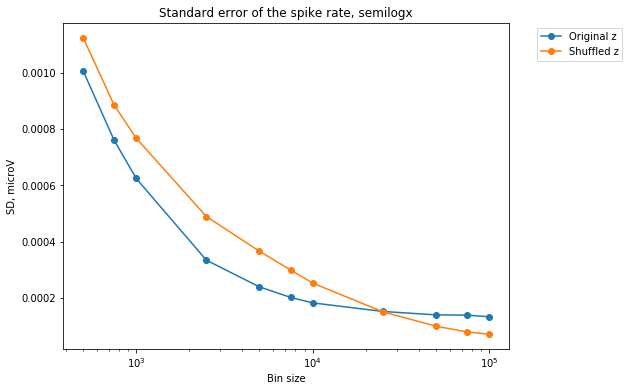

In [20]:
plt.figure(figsize = (8,6))

plt.semilogx(bin_size,std_spike_rate, 'o-', label = 'Original z')
plt.semilogx(bin_size, random_std_spike_rate, 'o-', label = 'Shuffled z')
# plt.semilogx(bin_size, bin_size**(-1/2), 'o-', label = '(bin_size)^(-1/2)')

plt.title('Standard error of the spike rate, semilogx')
plt.ylabel('SD, microV')
plt.xlabel('Bin size')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

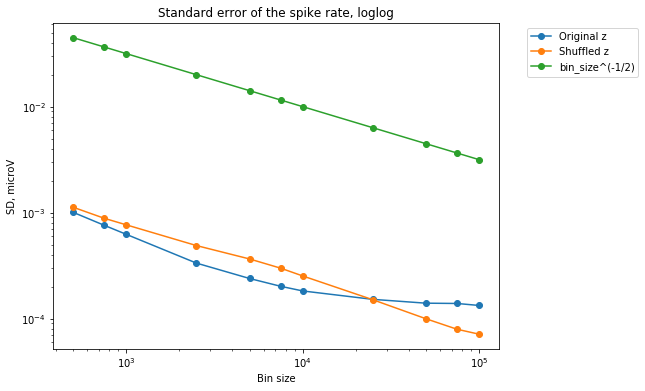

In [19]:
plt.figure(figsize = (8,6))

plt.loglog(bin_size,std_spike_rate, 'o-', label = 'Original z')
plt.loglog(bin_size, random_std_spike_rate, 'o-', label = 'Shuffled z')
plt.loglog(bin_size, bin_size**(-1/2), 'o-', label = 'bin_size^(-1/2)')

plt.title('Standard error of the spike rate, loglog')
plt.ylabel('SD, microV')
plt.xlabel('Bin size')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [25]:
pearsonr(random_std_spike_rate, bin_size**(-1/2))

(0.9993581644370049, 2.5143304472802344e-14)